In [1]:
# Question 1

elements =  [2,4,6,8,4,5,2,1,9,0,4,6,7,4,3,2,1,9,10,3,7,9,6,0,1,3,5,6,7,8,9,10,2,3,6,8,9,10,6,7,4,3]

frequency = {}

for item in elements:
    if item in frequency:
        frequency[item] += 1
    else:
        frequency[item] = 1


for key, value in sorted(frequency.items()):
    print("%d : %d" % (key, value))


0 : 2
1 : 3
2 : 4
3 : 5
4 : 5
5 : 2
6 : 6
7 : 4
8 : 3
9 : 5
10 : 3


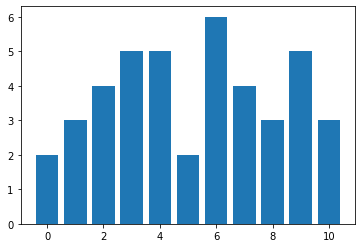

In [2]:
# Question 1 

import matplotlib.pyplot as plt
import numpy as np

x = frequency.keys()
y = frequency.values()

plt.bar(x,y)
plt.show()

In [3]:
# Question 1

import json


jsonstring = json.dumps(frequency)

print(jsonstring)

{"2": 4, "4": 5, "6": 6, "8": 3, "5": 2, "1": 3, "9": 5, "0": 2, "7": 4, "3": 5, "10": 3}


In [4]:
# Question 2

import pandas as pd

df = pd.read_json('your_posts_1.json')

df.head(3)

,timestamp,attachments,data,title,tags
0,2020-12-06 14:22:46,[{'data': [{'media': {'uri': 'photos_and_video...,[{'post': 'ãã§ã¼ã¹ããã¯ã§ã®æç¨¿ã...,NaN,NaN
1,2020-06-24 10:28:23,NaN,[{'post': 'Happy Birthday!! Hope you have an a...,Nanami Kano wrote on Saori Eto's timeline.,NaN
2,2020-03-14 08:12:12,[],[{'update_timestamp': 1584173532}],Nanami Kano shared a video from the playlist #...,NaN


In [5]:
# Question 2

df.rename(columns={'timestamp':'date'}, inplace = True)

df = df.drop(['attachments', 'title', 'tags'], axis = 1)

pd.to_datetime(df['date'])

df.head(3)

,date,data
0,2020-12-06 14:22:46,[{'post': 'ãã§ã¼ã¹ããã¯ã§ã®æç¨¿ã...
1,2020-06-24 10:28:23,[{'post': 'Happy Birthday!! Hope you have an a...
2,2020-03-14 08:12:12,[{'update_timestamp': 1584173532}]


In [6]:
# Question 2

print(df.shape)
df.tail(3)

(1053, 2)


,date,data
1050,2010-12-20 20:23:52,[{'post': 'Can't wait for Christmas!!!!!!'}]
1051,2010-12-14 02:23:03,[{'post': 'ã¿ããå¥½ãã£ã¦èããã®ã...
1052,2010-10-27 22:45:54,[{'post': 'Do u like it??'}]


In [7]:
# Question 2

df = df.set_index('date')

post_counts = df['data'].resample('MS').size()

post_counts

date
2010-10-01    1
2010-11-01    0
2010-12-01    3
2011-01-01    2
2011-02-01    0
             ..
2020-08-01    0
2020-09-01    0
2020-10-01    0
2020-11-01    0
2020-12-01    1
Freq: MS, Name: data, Length: 123, dtype: int64

In [8]:
#Question 2

import numpy as np

post_counts.mean()

8.560975609756097

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


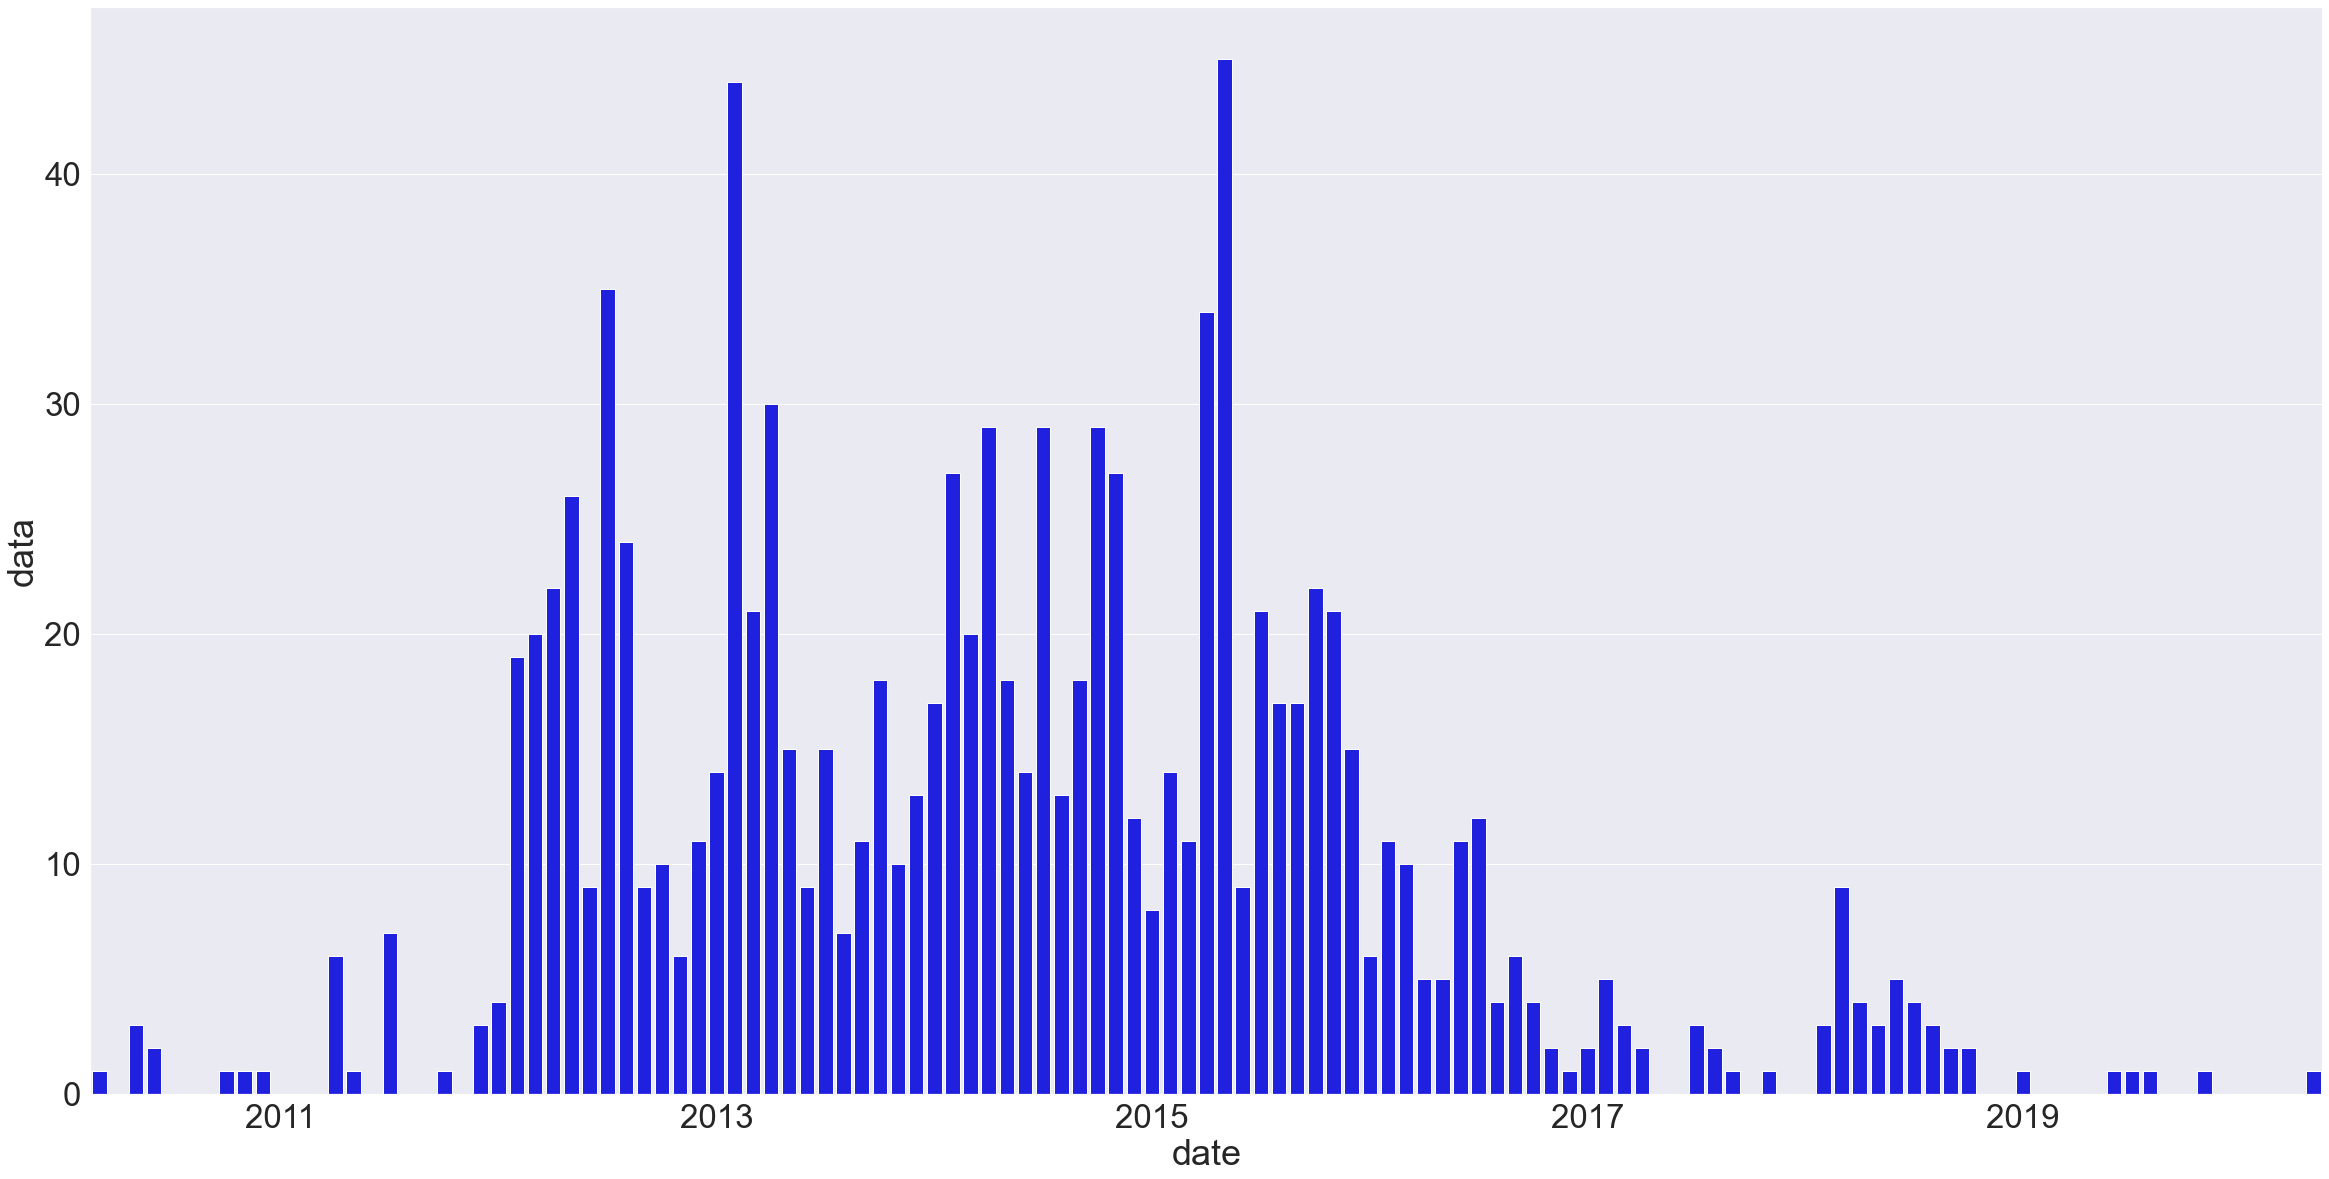

In [9]:
#Question 2

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(rc={'figure.figsize': (40,20)})
sns.set(font_scale = 3)

x_labels = post_counts.index

sns.barplot(x_labels, post_counts, color = 'blue')

tick_positions = np.arange(10, len(x_labels), step = 24)

plt.xticks(tick_positions, x_labels[tick_positions].strftime('%Y'))

plt.show()